<a href="https://colab.research.google.com/github/dariaAlium/iad/blob/master/Lab_2_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> Майнор "Интеллектуальный анализ данных" </center>

# <center> Курс "Введение в анализ данных" </center>

# <center> Лабораторная работа №2. Кластерный анализ. </center>

## Задание 1

В данном задании вам необходимо реализовать алгоритм кластеризации [Partition Around Medoids](http://algowiki-project.org/ru/%D0%A3%D1%87%D0%B0%D1%81%D1%82%D0%BD%D0%B8%D0%BA:Denemmy/Partitioning_Around_Medoids_%28%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC%29).  
  
Два возможных варианта реализации:  
  
### Функция
  
Нужно написать функцию, которая принимает на вход несколько параметров и возвращает также несколько значений.  
  
Параметры функции:
- **data:** данные в виде dataframe или матрицы (аналогично функциям и методам, которые рассматривали на практике);
- **k:** число центров (кластеров);
- **metric:** расстояние между объектами (те же, что поддерживает функция `pdist()`);
- **max_iter:** максимальное число итераций;  
- **tol:** минимальное значение изменения целевой функции.

Возвращаемые значения:  
- **inertia:** итоговое значение целевой функции;
- **medoids:** центры кластеров - индексы объектов данных, которые являются центрами;
- **labels:** метки кластеров для каждого объекта.
  
### Класс  
  
По аналогии с классами в scikit-learn, нужно реализовать класс, наследуемый от [Base Estimator](https://scikit-learn.org/stable/modules/generated/sklearn.base.BaseEstimator.html).  
Подробнее про реализацию своих моделей в scikit-learn: [here](https://scikit-learn.org/stable/developers/develop.html#rolling-your-own-estimator).
  
Параметры: 
- **k:** число центров (кластеров);
- **metric:** расстояние между объектами (те же, что поддерживает функция `pdist()`);
- **max_iter:** максимальное число итераций;  
- **tol:** минимальное значение изменения целевой функции.  
  
Методы:  
- **fit():** метод для выполнения кластеризации.  
    Аргументы метода:  
    - **data:** данные в виде dataframe или матрицы
  
Атрибуты:  
- **inertia_:** итоговое значение целевой функции;
- **medoids_:** центры кластеров - индексы объектов данных, которые являются центрами;
- **labels_:** метки кластеров для каждого объекта.  
   
<br>  
**Note 1:** Параметры `max_iter` и `tol` должны иметь дефолтные значения.  
**Note 2:** Функции для вычисления расстояний самим реализовывать не нужно, используйте `pdist()`.  
  
<br>  
Также необходимо написать документацию к функции/методу: описать формат входных данных (параметров) и возвращаемых значений, особенности работы функции и детали реализации алгоритма. В качестве образца можно взять документацию к функциям/методам, которые рассматривали на занятиях.  
  
Наивная реализация алгоритма будет работать довольно медленно - это нормально. Будет плюсом (но не является обязательным), если вы попытаетесь оптимизировать ваш код. Можете указать все ваши решения для оптимизации в документации.   

# Задание 2

В рамках данной лабораторной работы вам предлагается проанализировать набор данных по различным городам США. Каждый город характеризуется следующими признаками:

In [0]:
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
import numpy as np

In [0]:
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_colwidth', None)

In [3]:
data_desc = pd.read_csv('Data_Description.txt', sep=':')
data_desc

FileNotFoundError: ignored

### Notes:   
* Для всех признаков, кроме трех, чем выше значение - тем лучше. Для признаков `Housing` и `Crime` - наоборот.
* Признак `Population`- статистический признак, не имеющий интерпретации как “лучше-хуже”.
* Признак `Place` - уникальный идентификатор объекта (города), он не должен использоваться при кластеризации.
* Также в данных присутствуют географические координаты городов - `Longitude` и `Latitude`. Их также не следует использовать при кластеризации данных.

In [4]:
data = pd.read_csv('data.txt', sep=' ')
data

,Place,Climate,HousingCost,HlthCare,Crime,Transp,Educ,Arts,Recreat,Econ,Long,Lat,Pop
0,"Abilene,TX",521,6200,237,923,4031,2757,996,1405,7633,-99.6890,32.5590,110932
1,"Akron,OH",575,8138,1656,886,4883,2438,5564,2632,4350,-81.5180,41.0850,660328
2,"Albany,GA",468,7339,618,970,2531,2560,237,859,5250,-84.1580,31.5750,112402
3,"Albany-Schenectady-Troy,NY",476,7908,1431,610,6883,3399,4655,1617,5864,-73.7983,42.7327,835880
4,"Albuquerque,NM",659,8393,1853,1483,6558,3026,4496,2612,5727,-106.6500,35.0830,419700
...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,"Worcester,MA",562,8715,1805,680,3643,3299,1784,910,5040,-71.7950,42.2720,402918
325,"Yakima,WA",535,6440,317,1106,3731,2491,996,2140,4986,-120.5130,46.5950,172508
326,"York,PA",540,8371,713,440,2267,2903,1022,842,4946,-76.7280,39.9600,381255
327,"Youngstown-Warren,OH",570,7021,1097,938,3374,2920,2797,1327,3894,-80.7290,41.1700,531350


<br>  
### Задания: 

&nbsp;&nbsp;&nbsp;0. Выполните необходимую предобработку данных. Перед кластеризацией исключите из данных признаки `Place`, `Long` и `Lat`.

1. Выполните кластеризацию иерархическим методом.  
Рассмотрите различные расстояния между объектами. Определите, какие следует использовать при кластеризации.  
Выполните кластеризацию с различными расстояниями между кластерами. Сравните результаты, сделайте выводы.  
<br>  
2. Выполните кластеризацию методом dbscan. Используйте расстояния между объектами, определенные в предыдущем пункте.  
Реализуйте эвристику (см. лекции) для выбора параметров алгоритма. Подберите подходящие параметры алгоритма.  
<br>  
3. Выполните кластеризацию методом kmeans. Определите наилучшее (на ваш взгляд) число кластеров.  
<br>  
4. Выполните кластеризацию методом PAM. Используйте расстояния между объектами, определенные в пункте (1). Определите наилучшее (на ваш взгляд) число кластеров.  
Используйте реализацию алгоритма из Задания 1.  
<br>  
5. (Бонусное) Выполните кластеризацию другими методами. Например, [HDBSCAN](https://hdbscan.readthedocs.io/en/latest/) или алгоритмы, [реализованные](https://scikit-learn.org/stable/modules/clustering.html) в scikit-learn.  
<br>  
6. В результате выполнения предыдущих пунктов вы должны получить 4 или больше разбиения объектов (по одному на каждый метод). Сравните их между собой, сделайте выводы о сходствах и различиях.  
Оцените результаты каждой кластеризации, используя метрики, рассмотренные на занятиях (Silhouette и прочие).  
<br>  
7. Выберите одно разбиение, наиболее подходящее на ваш взгляд. Предложите интерпретацию полученным кластерам или покажите, что этого сделать нельзя.  
<br>  
8. Оцените, как полученные кластеры распределены географически. (Бонусное) [Провизуализируйте](https://python-visualization.github.io/folium/quickstart.html) распределение на карте США.  
Оцените, как полученные кластеры распределены по штатам. Можно ли выделить какую-то зависимость (территориальную или для штатов)?

In [197]:
#0 task
data_nec = data.copy()
data_nec.drop(['Place', 'Long', 'Lat'], axis=1, inplace=True) # axis=0 will do for rows

from sklearn import preprocessing
data_nec = pd.DataFrame(preprocessing.normalize(data_nec), columns=list(data_nec.columns))
# Create the Scaler object
scaler = preprocessing.StandardScaler()# Fit your data on the scaler object
scaled_df = scaler.fit_transform(data_nec)
#data_nec = pd.DataFrame(scaled_df, columns=list(data_nec.columns))
data_nec


,Climate,HousingCost,HlthCare,Crime,Transp,Educ,Arts,Recreat,Econ,Pop
0,0.004673,0.055609,0.002126,0.008279,0.036155,0.024728,0.008933,0.012602,0.068462,0.994972
1,0.000871,0.012322,0.002507,0.001342,0.007393,0.003691,0.008425,0.003985,0.006586,0.999820
2,0.004148,0.065044,0.005477,0.008597,0.022432,0.022689,0.002100,0.007613,0.046530,0.996194
3,0.000569,0.009459,0.001712,0.000730,0.008233,0.004066,0.005568,0.001934,0.007014,0.999869
4,0.001569,0.019987,0.004413,0.003532,0.015617,0.007206,0.010707,0.006220,0.013638,0.999465
...,...,...,...,...,...,...,...,...,...,...
324,0.001394,0.021621,0.004478,0.001687,0.009038,0.008184,0.004426,0.002258,0.012504,0.999589
325,0.003096,0.037273,0.001835,0.006401,0.021594,0.014417,0.005765,0.012386,0.028858,0.998430
326,0.001416,0.021948,0.001869,0.001154,0.005944,0.007611,0.002680,0.002208,0.012968,0.999619
327,0.001073,0.013211,0.002064,0.001765,0.006349,0.005494,0.005263,0.002497,0.007327,0.999829


In [96]:
from scipy.cluster.hierarchy import fcluster
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, is_valid_linkage, dendrogram
import seaborn as sbs
def ierarxy(method, metric):
  Z = linkage(data_nec, method=method, metric=metric)
  plt.title(method + " " + metric)
  dendrogram(Z)
  plt.show()

methods = ['complete', 'average', 'weighted']
metrics = ['braycurtis', 'canberra', 'chebyshev', 'cityblock', 'correlation', 
           'cosine', 'dice', 'euclidean', 'hamming', 'jaccard', 'jensenshannon', 
           'kulsinski', 'mahalanobis', 'matching', 'minkowski', 'rogerstanimoto', 
           'russellrao', 'seuclidean', 'sokalmichener', 'sokalsneath', 
           'sqeuclidean']

for i in methods:
  for j in metrics:
    ierarxy(i, j)

methods = [ 'centroid', 'median', 'ward']
for i in methods:
    ierarxy(i, 'euclidean')
'''
Вывод: наиболее оптимальная комбинация complete conberra
'''

[[127.         297.           1.65954733   2.        ]
 [ 12.         115.           1.66840209   2.        ]
 [ 93.         110.           1.67489513   2.        ]
 ...
 [648.         650.          10.          46.        ]
 [653.         654.          10.         108.        ]
 [652.         655.          10.         329.        ]]


ValueError: ignored

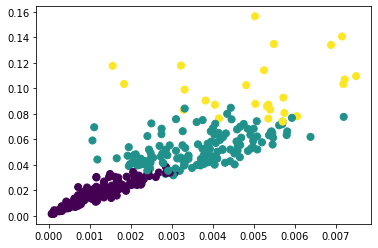

In [201]:
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs


kmeans = KMeans(n_clusters = 3, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(data_nec)
data_nec['kmeans'] = kmeans.labels_
cmap = sns.cubehelix_palette(as_cmap=True)
centers = kmeans.cluster_centers_
plt.scatter(data_nec.to_numpy()[:, 0], data_nec.to_numpy()[:, 1], c = data_nec['kmeans'].to_numpy(), s = 50, cmap = 'viridis')
plt.show()
data_nec.drop(['kmeans'], axis=1, inplace=True)

[0.01618418 0.00275236 0.01110498 0.00190118 0.00275178 0.00419584
 0.00328831 0.00333235 0.00588091 0.00897252 0.00211828 0.00932855
 0.00798699 0.00936831 0.01355076 0.00996791 0.00307697 0.00707855
 0.01739283 0.00174417 0.00746244 0.00534799 0.00321843 0.00357795
 0.00418656 0.00126039 0.01591735 0.00295653 0.0058964  0.00414484
 0.00861618 0.01842269 0.00814769 0.00376946 0.01356997 0.00732885
 0.00622524 0.00121528 0.02431039 0.01796986 0.01373597 0.0112047
 0.00177979 0.01403209 0.01127442 0.00552231 0.01282511 0.01042025
 0.02286492 0.00828594 0.00720326 0.02431014 0.00225407 0.01164376
 0.0162082  0.00422344 0.02286495 0.00594244 0.01136005 0.004024
 0.00646002 0.00153394 0.01533154 0.00307123 0.00122201 0.00898686
 0.0017514  0.00834616 0.00186439 0.0068004  0.01888313 0.00378652
 0.00334118 0.00169874 0.00376636 0.01310073 0.00093608 0.03133097
 0.00964374 0.00390716 0.00199353 0.0068427  0.00546682 0.00171543
 0.00464572 0.001431   0.00702847 0.00826349 0.00879134 0.0072830

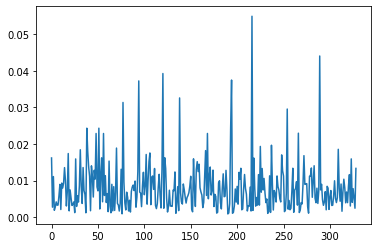

[-1  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0 -1  0  0  0  0  0
  0  0 -1  0  0  0  0 -1  0  0 -1  0  0  0 -1 -1 -1  0  0  0  0  0  0  0
 -1  0  0 -1  0  0 -1  0 -1  0  0  0  0  0 -1  0  0  0  0  0  0  0 -1  0
  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0
  0  0  0  0  0  0 -1  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0
 -1  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0 -1  0
 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0 -1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 -1  0 -1  0  0  0  0  0  0 -1  0 -1  0  0  0  0  0  0  0  0  0 -1  0  0
  0  0  0  0  0  0  0  0 -1  0  0  0  0  0 -1  0  0  0  0  0 -1  0  0  0
  0  0 -1  0  0  0  0  0 -1  0  0  0  0  0  0  0 -1  0  0 -1  0  0  0  0
  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0
  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0

<Figure size 864x864 with 0 Axes>

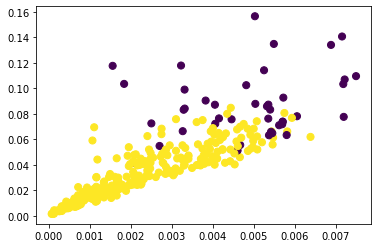

<Figure size 864x864 with 0 Axes>

In [237]:
# 2 task
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import pairwise_distances

d = pairwise_distances(data_nec) 
d[d==0] = np.inf  
y = np.sort(d, axis=1)[:, :3].mean(axis=1)
print(y)
plt.plot(range(len(y)), y)
plt.show()

dbscan = DBSCAN(eps=0.015, min_samples=6)
X_embedded = dbscan.fit_predict(data_nec)
print(X_embedded)
plt.scatter(data_nec.to_numpy()[:, 0], data_nec.to_numpy()[:, 1], c = X_embedded, s = 50, cmap = 'viridis')
plt.figure(figsize=(12, 12))

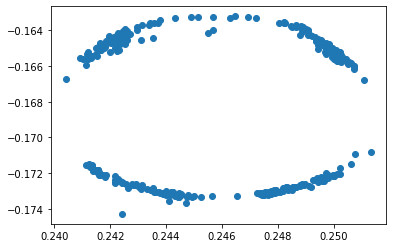

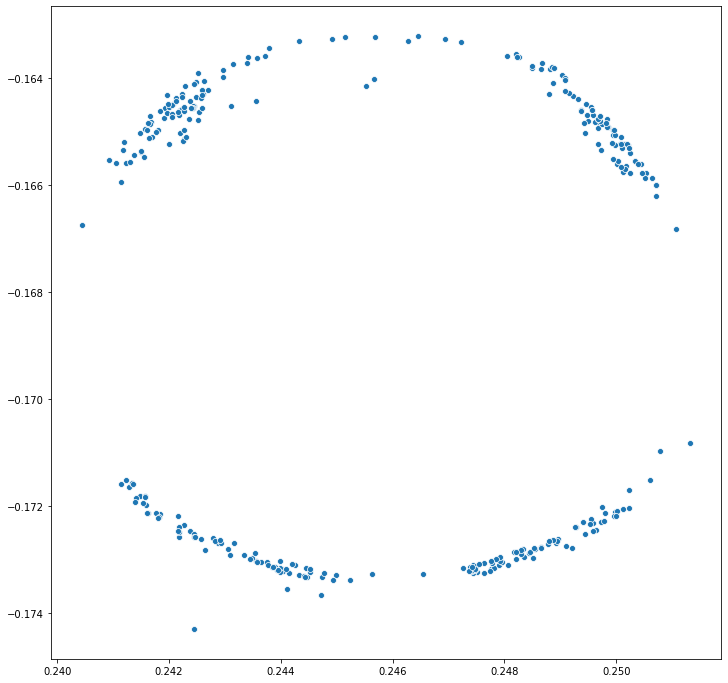

In [91]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
X_embedded = TSNE(n_components=2, perplexity=600, learning_rate = 200, 
                  init = 'pca', metric='canberra', method='exact').fit_transform(data_nec)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1])
plt.figure(figsize=(12, 12))
palette = sns.color_palette("bright", 10)
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], legend='full', palette=palette)
